### Problem 1

#### c) Decay of eigenvalues

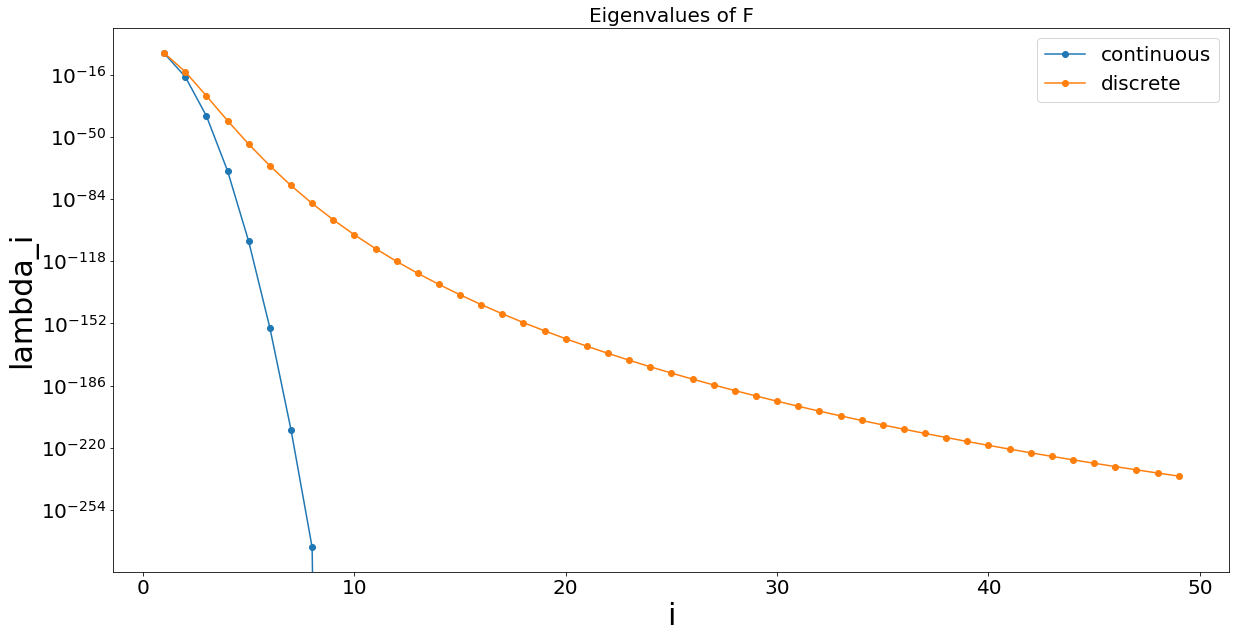

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 40
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

T = 1.0
L = 1.0
k = 1.0
nx = 200
nt = 100
h = L/float(nx)
dt = T/float(nt)

i = np.arange(1,50)
lambdas = np.exp( -k*T*np.power( np.pi*i/L , 2 ) )

lambdas_discrete = np.power( 1 + 4*k*dt/h/h*np.power(np.sin(np.pi*i/2/nx),2), -nt)

plt.figure(figsize=(20,10))
plt.semilogy(i, lambdas, 'o-')
plt.semilogy(i, lambdas_discrete, 'o-')
plt.xlabel('i')
plt.ylabel('lambda_i')
plt.title("Eigenvalues of F")
plt.legend(['continuous', 'discrete'])
plt.show()

### Problem 2
#### b) The decay of eigenvalues

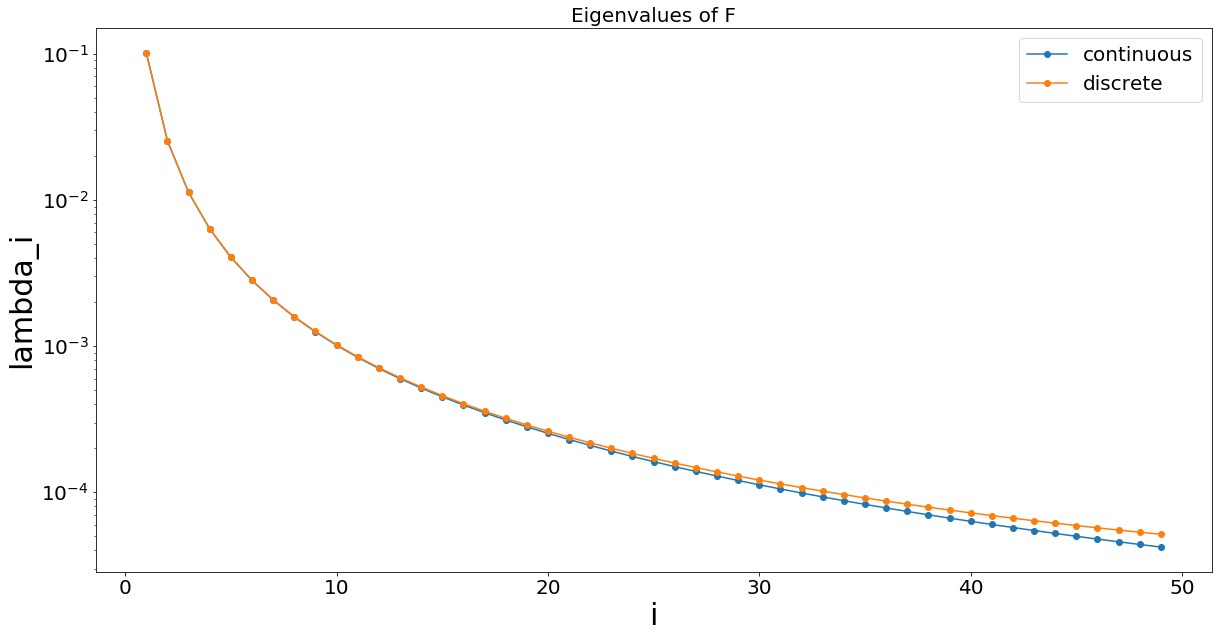

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 40
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

L = 1.0
k = 1.0
nx = 100
h = L/float(nx)

i = np.arange(1,50)
lambdas = 1.0/k*np.power(L/np.pi/i, 2)

lambdas_discrete = 1.0/( k*4/h/h*np.power( np.sin(np.pi*i/2/nx) , 2 ) )

plt.figure(figsize=(20,10))
plt.semilogy(i, lambdas, 'o-')
plt.semilogy(i, lambdas_discrete, 'o-')
plt.xlabel('i')
plt.ylabel('lambda_i')
plt.title("Eigenvalues of F")
plt.legend(['continuous', 'discrete'])
plt.show()

#### c) Naive inversion

In [2]:
from __future__ import print_function, absolute_import, division

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 40
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

def plot(f, style, **kwargs):
    x = np.linspace(0., L, nx+1)
    f_plot = np.zeros_like(x)
    f_plot[1:-1] = f
    plt.plot(x,f_plot, style, **kwargs)
    
def assembleMatrix(k, h, n):
    """
    The function assembles the matrix (I + \delta_t K)
    Here:
    - k is the thermal diffusivity coefficient
    - h is the spacial discretization size
    - n is the number of subintervals
    """
    # To assemble matrix K, first create 3 diagonals
    # and then call scipy function `spdiags`,
    # which creates a sparse matrix given the diagonals
    diagonals = np.zeros((3, n))   # 3 diagonals
    diagonals[0,:] = -1.0/h**2
    diagonals[1,:] =  2.0/h**2
    diagonals[2,:] = -1.0/h**2
    K = k*sp.spdiags(diagonals, [-1,0,1], n,n)
    
    return K
    

def solveFwd(m, k, h, n):
    """
    The function computes the axial deformation, u(x),
    for a given body force m.
    Here:
    - m is the body force
    - k is the elastic modulus
    - h is the spacial discretization size
    - n is the number of subintervals 
    """
    
    
    # Assemble the matrix
    A = assembleMatrix(k, h, n)
    
    # Solve the forward problem
    u_old = m.copy()
    u = la.spsolve(A, u_old)
    
    return u        

def naiveSolveInv(d, k, h, n):
    """
    Solves the inverse problem by applying 
    the matrix K
    """
    A = assembleMatrix(k, h, n)
    
    p = A*d.copy()
        
    return p

In [3]:
# physical parameters
L = 1.0
k = 1.0
noise_std_dev = 1e-2
h = L/float(nx)

def showInvresionResults(nx, noise_std_dev, L, k):
    # utility function to show inversion results
    
    
    h = L/float(nx)

    x = np.linspace(0.+h, L-h, nx-1) #place nx-1 equispace point in the interior of [0,L] interval
    m_true = np.maximum( np.zeros_like(x), 1. - np.abs(1. - 4.*x)) + 100.*np.power(x,10)*np.power(1.-x,2)
    u_true = solveFwd(m_true, k, h, nx-1)

    d = u_true + noise_std_dev*np.random.randn(u_true.shape[0])

    m = naiveSolveInv(d, k, h, nx-1)

    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plot(m_true, "-.b", label = 'm_true')
    plot(m, "-r", label = 'm')
    plt.legend()
    plt.title("Body force profile")
    plt.subplot(1,2,2)
    plot(u_true, "-b", label = 'u(x)')
    plot(d, "og", label = 'd')
    plt.legend()
    plt.title("Axial deformation solution")
    plt.show()

/home/jiaqi/anaconda3/envs/env-name/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


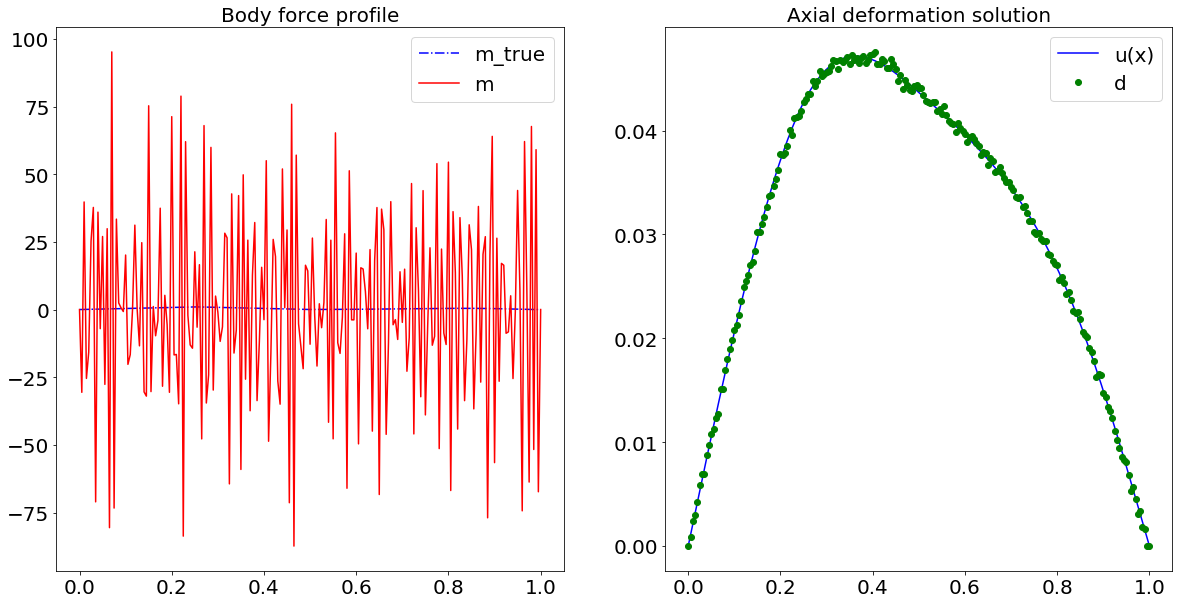

In [4]:
L = 1.0
k = 1.0
nx = 200
noise_std_dev = 0.0004

showInvresionResults(nx, noise_std_dev, L, k)

#### d) Tikhonov regularization

In [5]:
def assembleF(k, h, n):
    F = np.zeros((n,n))
    m_i = np.zeros(n)
    
    for i in np.arange(n):
        m_i[i] = 1.0
        F[:,i] = solveFwd(m_i, k, h, n)
        m_i[i] = 0.0

    return F

def solveTikhonov(d, F, alpha):    
    H = np.dot( F.transpose(), F) + alpha*np.identity(F.shape[1])
    rhs = np.dot( F.transpose(), d)
    return np.linalg.solve(H, rhs)

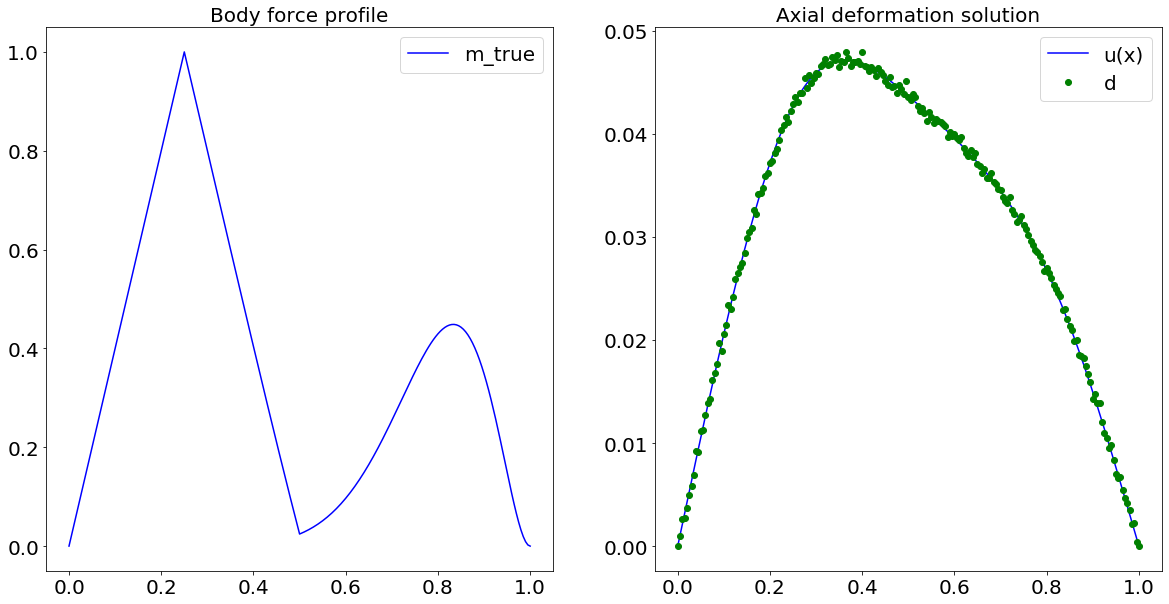

In [6]:
L = 1.0
k = 1.0

nx = 200

noise_std_dev = 0.0004

h = L/float(nx)

## Compute the data d by solving the forward model
x = np.linspace(0.+h, L-h, nx-1)
m_true = np.maximum( np.zeros_like(x), 1. - np.abs(1. - 4.*x)) + 100.*np.power(x,10)*np.power(1.-x,2)
u_true = solveFwd(m_true, k, h, nx-1)
d = u_true + noise_std_dev*np.random.randn(u_true.shape[0])

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plot(m_true, "b", label = 'm_true')
plt.legend()
plt.title("Body force profile")
plt.subplot(1,2,2)
plot(u_true, "-b", label = 'u(x)')
plot(d, "og", label = 'd')
plt.legend()
plt.title("Axial deformation solution")
plt.show()


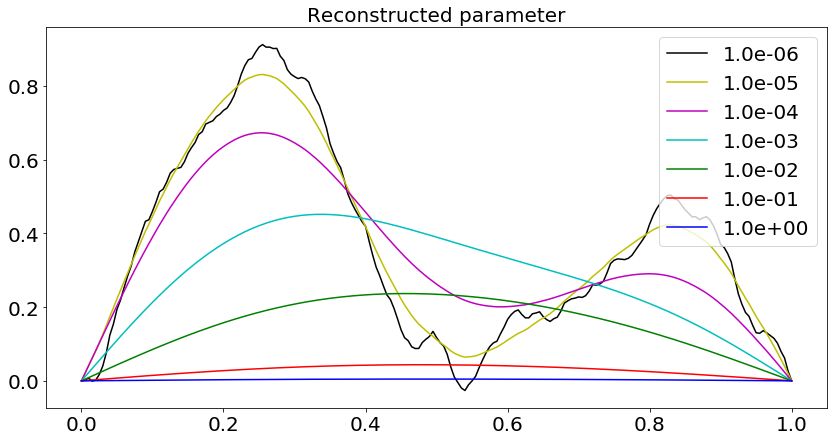

In [9]:
F = assembleF(k, h, nx-1)
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
plt.figure(figsize=(14,7))
for alpha in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.]:
    m_alpha = solveTikhonov(d, F, alpha)
    plot(m_alpha, "-"+colors.pop(), label = '{0:.1e}'.format(alpha))

plt.legend()
plt.title("Reconstructed parameter")
plt.show()

### e) L-curve approach to choose optimal $\alpha$

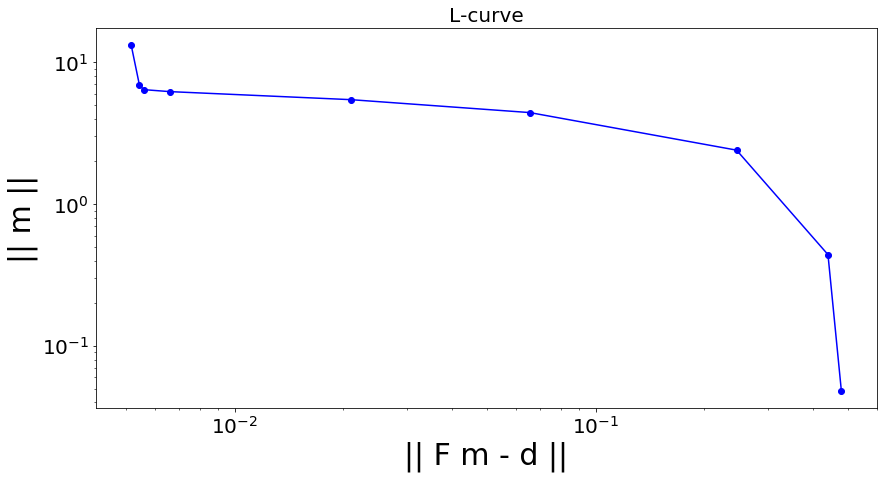

In [10]:
norm_m = [] #norm of parameter
norm_r = [] #norm of misfit (residual)
plt.figure(figsize=(14,7))
for alpha in [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.]:
    m_alpha = solveTikhonov(d, F, alpha)
    norm_m.append( np.sqrt( np.dot(m_alpha,m_alpha) ) )
    u_alpha = solveFwd(m_alpha, k, h, nx-1)
    norm_r.append( np.sqrt( np.dot(d-u_alpha,d-u_alpha) ) )
    
plt.loglog(norm_r, norm_m, "-ob")
plt.xlabel("|| F m - d ||")
plt.ylabel("|| m ||")
plt.title("L-curve")
plt.show()

### f) Morozov's discrepancy criterion

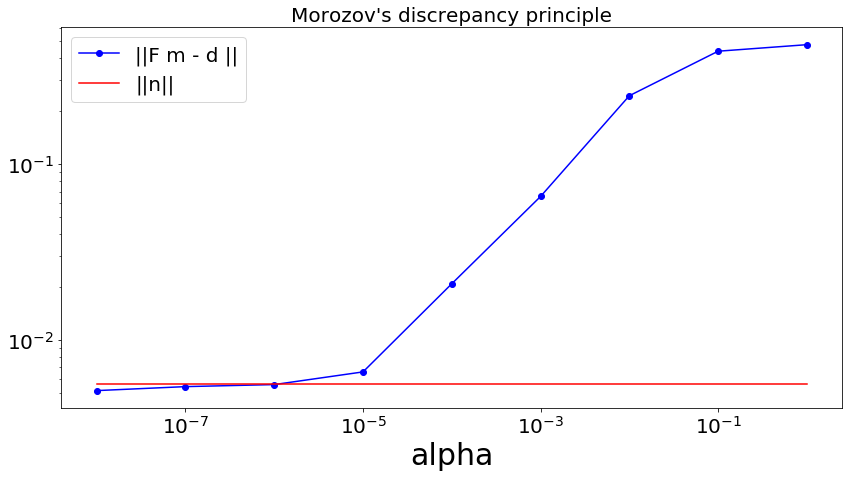

In [12]:
alphas = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.]
norm_r = [] #norm of misfit (residual)
plt.figure(figsize=(14,7))
for alpha in alphas:
    m_alpha = solveTikhonov(d, F, alpha)
    u_alpha = solveFwd(m_alpha, k, h, nx-1)
    norm_r.append( np.sqrt( np.dot(d-u_alpha,d-u_alpha) ) )
    
plt.loglog(alphas, norm_r, "-ob", label="||F m - d ||")
plt.loglog(alphas, [noise_std_dev*np.sqrt(nx-1)]*len(alphas), "-r", label="||n||")
plt.xlabel("alpha")
plt.legend()
plt.title("Morozov's discrepancy principle")
plt.show()

### g) Reconstruction error

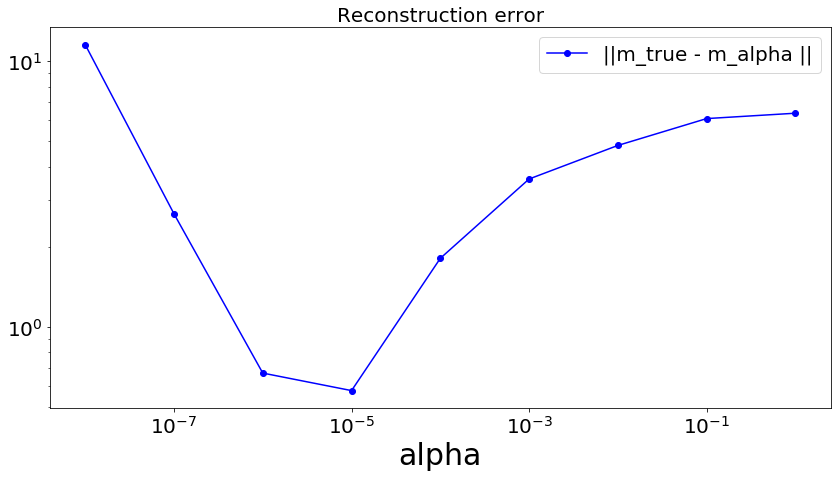

In [13]:
alphas = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.]
err_m = [] #norm of misfit (residual)
plt.figure(figsize=(14,7))
for alpha in alphas:
    m_alpha = solveTikhonov(d, F, alpha)
    err_m.append( np.sqrt( np.dot(m_true-m_alpha,m_true-m_alpha) ) )
    
plt.loglog(alphas, err_m, "-ob", label="||m_true - m_alpha ||")
plt.xlabel("alpha")
plt.legend()
plt.title("Reconstruction error")
plt.show()